In [1]:
import numpy as np
import random
import torch
import dataloader
import matplotlib.pyplot as plt

In [2]:
raw_dataset = dataloader.get_dataset(None, 8192)
print({ k: len(v) for k, v in raw_dataset.items() })

{'Whistling': 22, 'Train': 895, 'Clapping': 546, 'BackgroundSounds': 8192, 'Laughing': 216, 'Whistle': 21, 'Horn': 1146, 'Dog': 2768, 'Noise': 1950, 'Sneezing': 154, 'Aircraft': 1119, 'BirdChirp': 1299, 'Crow': 621, 'Siren': 2363, 'Rooster': 402, 'Scream': 36, 'Wind': 1408, 'Gunshot': 8, 'Frog': 3608, 'CarDoor': 452, 'VehicleExhaust': 292, 'Engine': 5845, 'Coughing': 736, 'Cat': 242, 'Bell': 702, 'Thunder': 488, 'Beeping': 98, 'Unknown': 293, 'Insects': 1986, 'Sheep': 191, 'Basketball': 752, 'Drums': 6193, 'Cow': 168, 'GunNoise': 2448, 'PowerTool': 1537, 'GlassBreak': 982, 'Skateboarding': 76, 'Jackhammer': 2882, 'HandSaw': 332}


In [3]:
print(f'gpu enabled: {torch.cuda.is_available()}')
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

import mfcc
import mfcc_vae_1 as vae

encoder = vae.Encoder(embedding_size = 16).to(device)
# encoder.load_state_dict(torch.load('mfcc-untested-1/encoder-F16-A0.9-E256-L171.pt'))
# encoder.load_state_dict(torch.load('mfcc-untested-2/encoder-F16-A0.99-E256-L182.pt'))
encoder.load_state_dict(torch.load('mfcc-untested-3/encoder-F16-A0.999-E256-L183.pt'))
encoder.eval()

def prep_sample(x):
    s = mfcc.mfcc_spectrogram_for_learning(x, dataloader.UNIFORM_SAMPLE_RATE)
    with torch.no_grad():
        encoder_input = torch.tensor(s.reshape(1, *s.shape), dtype=torch.float32).to(device)
        mean, logstd = encoder.forward(encoder_input)
        assert mean.shape == (1, encoder.embedding_size)
        return np.array(mean.cpu()).reshape(-1)

dataset = { k: [prep_sample(x) for x in v] for k, v in raw_dataset.items() }

gpu enabled: True


In [9]:
class_count = 5
sub_classes = dict(random.sample(list(dataset.items()), class_count))
print({ k: len(v) for k, v in sub_classes.items() })

{'GunNoise': 2448, 'Dog': 2768, 'Basketball': 752, 'BirdChirp': 1299, 'Rooster': 402}


# PCA

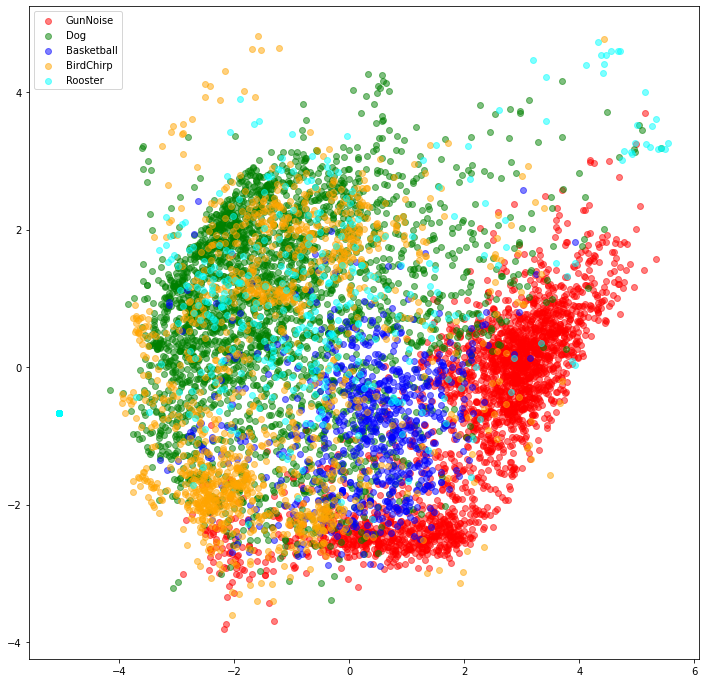

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit_transform([x for xs in sub_classes.values() for x in xs])
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()
labels = list(sub_classes.keys())
colors = ['red', 'green', 'blue', 'orange', 'cyan', 'black', 'yellow']
for label, values in { k: pca.transform(v) for k, v in sub_classes.items() }.items():
    idx = labels.index(label)
    ax.scatter(*values.T, color = colors[idx], alpha = 0.5, label = label)
plt.legend()

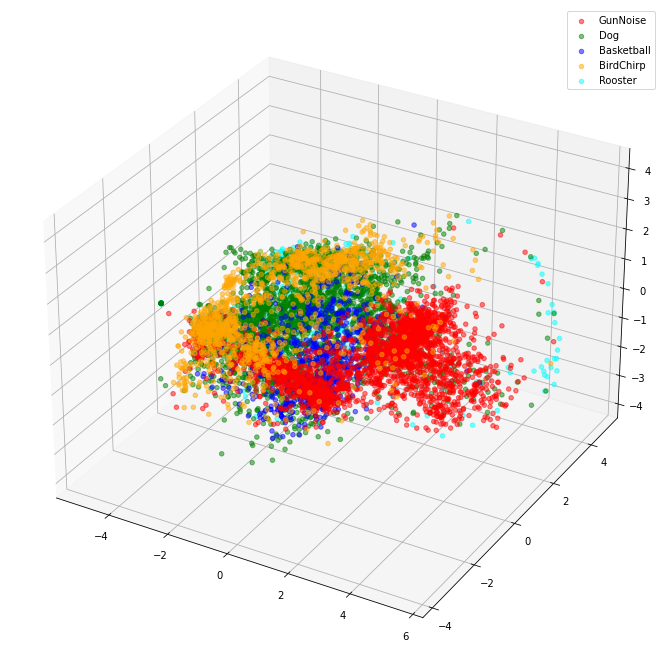

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit_transform([x for xs in sub_classes.values() for x in xs])
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection = '3d')
labels = list(sub_classes.keys())
colors = ['red', 'green', 'blue', 'orange', 'cyan', 'black', 'yellow']
for label, values in { k: pca.transform(v) for k, v in sub_classes.items() }.items():
    idx = labels.index(label)
    ax.scatter(*values.T, color = colors[idx], alpha = 0.5, label = label)
plt.legend()

# UMAP

/home/devin/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


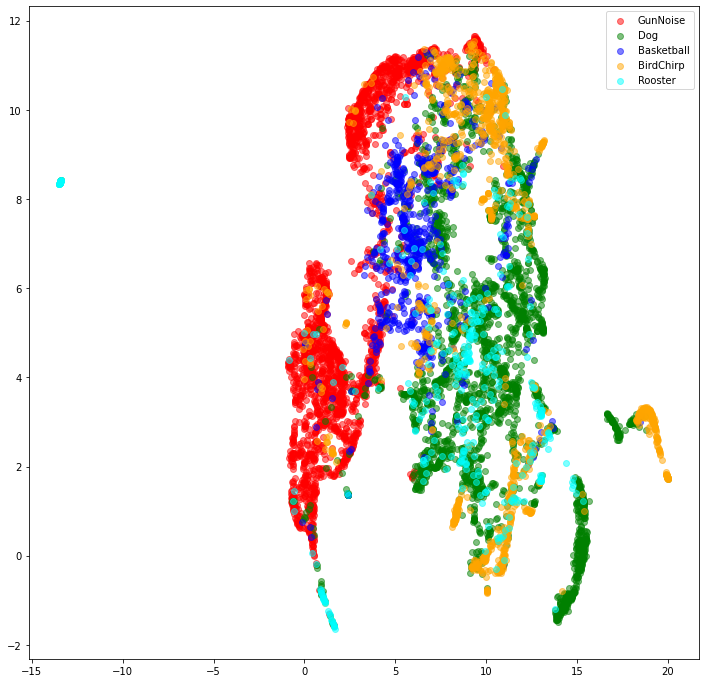

In [19]:
from umap import UMAP
umap = UMAP(n_components = 2)
umap.fit_transform([x for xs in sub_classes.values() for x in xs])
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()
labels = list(sub_classes.keys())
colors = ['red', 'green', 'blue', 'orange', 'cyan', 'black', 'yellow']
for label, values in { k: umap.transform(v) for k, v in sub_classes.items() }.items():
    idx = labels.index(label)
    ax.scatter(*values.T, color = colors[idx], alpha = 0.5, label = label)
plt.legend()

/home/devin/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


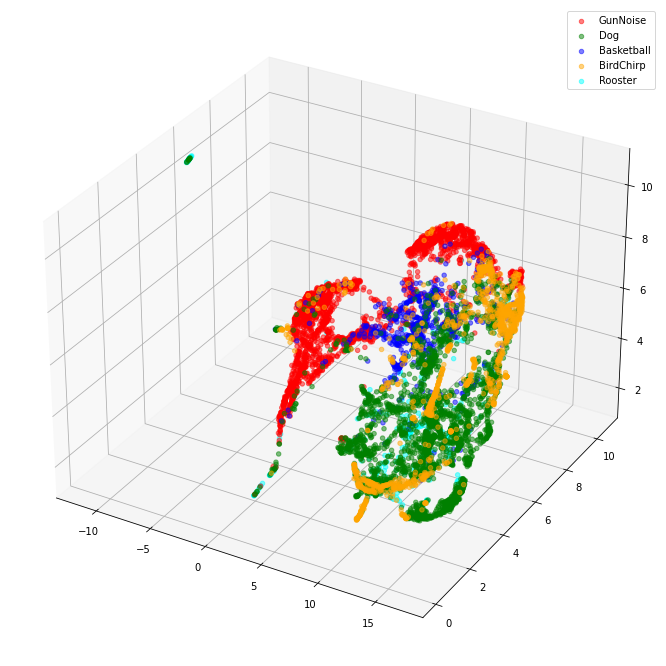

In [20]:
from umap import UMAP
umap = UMAP(n_components = 3)
umap.fit_transform([x for xs in sub_classes.values() for x in xs])
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection = '3d')
labels = list(sub_classes.keys())
colors = ['red', 'green', 'blue', 'orange', 'cyan', 'black', 'yellow']
for label, values in { k: umap.transform(v) for k, v in sub_classes.items() }.items():
    idx = labels.index(label)
    ax.scatter(*values.T, color = colors[idx], alpha = 0.5, label = label)
plt.legend()